# Survival Multiarmed Bandits

## Comparing Multiple Algorithms using Repetitions

In [ ]:
#Dependencies

import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
#import pickle

#Arms
from SMPyBandits.Arms import Bernoulli, Gaussian, Constant
from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import Uniform, EmpiricalMeans, UCBalpha, UCBV, klUCB, Thompson, SoftMix, BayesUCB
from mabalgs import SafeEpsilonGreedy, SafeUCB, SafeUCBalpha, ClassicEpsilonGreedy, ClassicEpsilonDecreasing, ClassicOptimisticGreedy, SafeKLUCB, PositiveGamblerUCB, GamblerBayesUCB, MaRaB

#Sim
from mabsim import mabs
from mabplot import mabplt

## Simple

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

# BERNOULLI ARMS :

maxr = +1.0
minr = 0.0
ampl = maxr - minr

k = 50

ps = np.linspace(0.0, 1.0, k)
A = [ExtendedBernoulli(p, maxr=maxr, minr=minr) for p in ps]

np.linspace(-1.0, 0.2, 10)

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ])

In [3]:
#algorithms
G = [
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     klUCB(k, lower=minr, amplitude=ampl),
     #UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
    ]

labels = ["$\epsilon$-greedy", "KL-UCB", "UCB"]
colors=['r', 'g', 'b']

## Simulation Bernoulli : short-horizon

 - Several Repetitions 
 - Short Horizon

In [4]:
win = 10
b_0 = 10


#time-horizon
tau = 500

#repetitions
n = 100

M1 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M1.run(tqdm_leave=True)

repetitions:   0%|          | 0/100 [00:00<?, ?it/s]

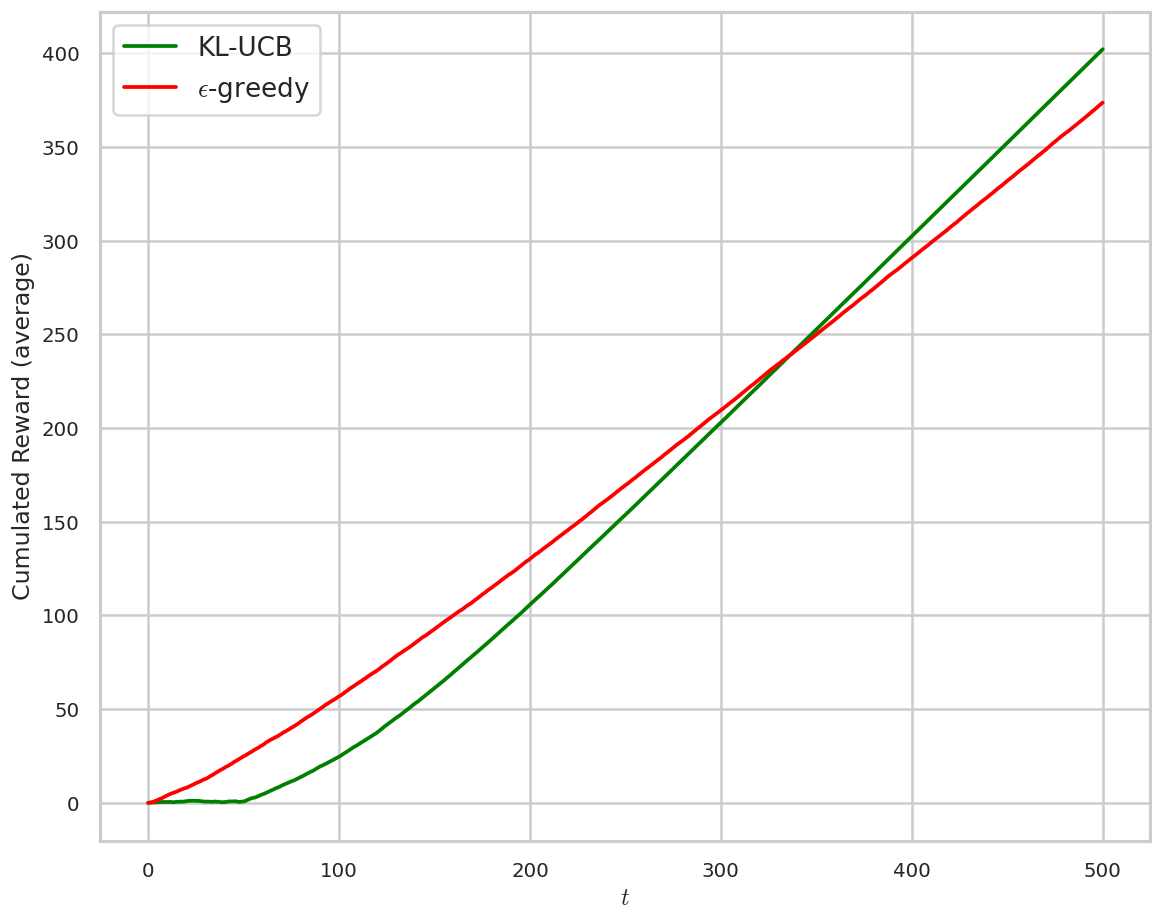

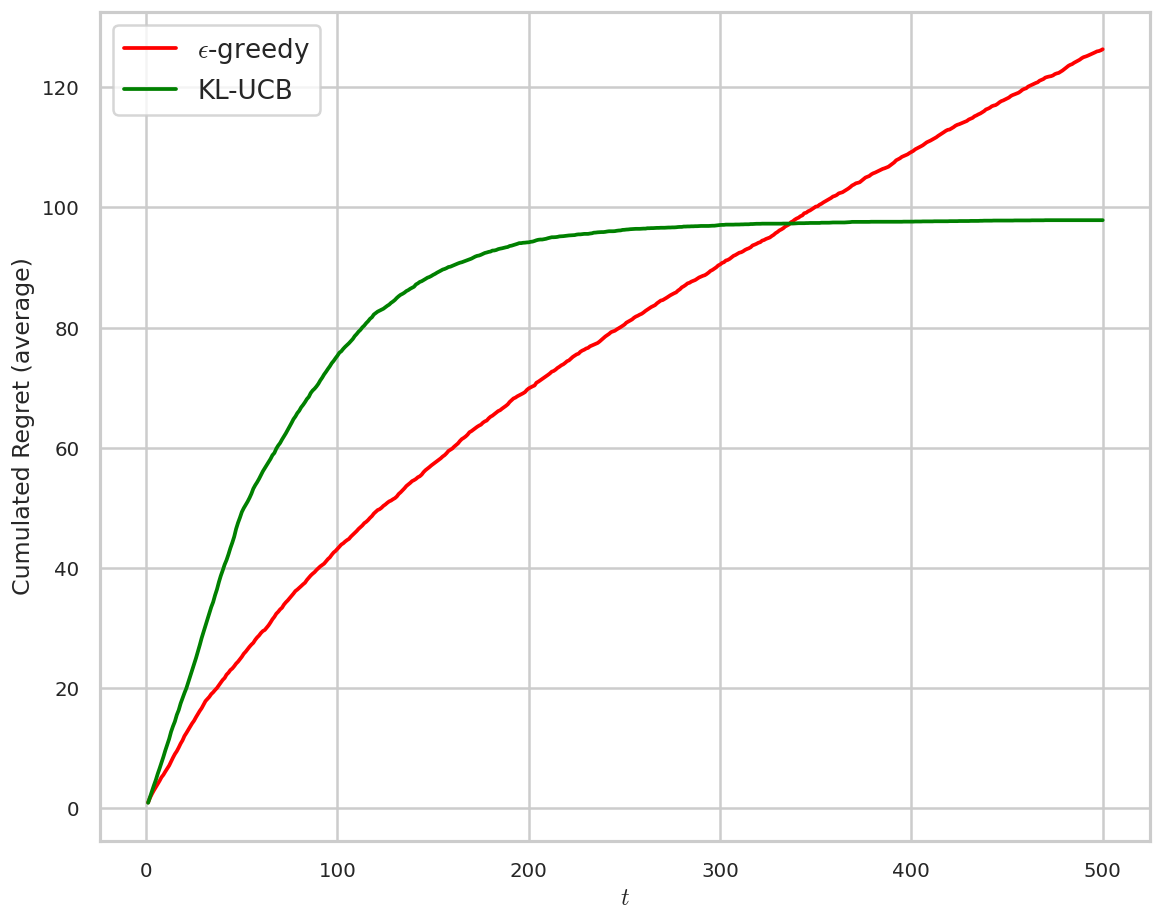

In [5]:
P1 = mabplt(M1)

#P1.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="")

P1.plot_cumulated_reward_progression(show=False, title="", ylabel="Cumulated Reward (average)", names=labels, linecolors=colors)
plt.tight_layout()
plt.savefig('images/simple_reward_progression_B_t500.pdf', bbox_inches='tight')
plt.show()

P1.plot_cumulated_regret_progression(show=False, title="", ylabel="Cumulated Regret (average)", names=labels, linecolors=colors)
plt.tight_layout()
plt.savefig('images/simple_regret_progression_B_t500.pdf', bbox_inches='tight')
plt.show()

## Simulation Bernoulli : long-horizon

 - Few Repetitions 
 - Long Horizon

In [6]:
win = 10
b_0 = 10

#time-horizon
tau = 10000 #15000 

#repetitions
n = 50 #100

M2 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M2.run(tqdm_leave=True)

repetitions:   0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
P2 = mabplt(M2)

values = [M2.renb, M2.MTTNB, M2.DTTNB, M2.mstnb, M2.dstnb, M2.msnb, M2.dsnb, M2.msl, M2.dsl]

df = pd.DataFrame(values, crits, labels)
display(df)

P2.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_total_rewards(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="")

P2.plot_survival_progression(show=False, title="", ylabel="Survival Rate", names=labels, linestyles=styles, linecolors=colors)
plt.savefig('images/survival_progression_B_t10000.pdf')
plt.show()

P2.plot_budget_progression(show=False, title="", ylabel="Budget (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(-600, 1800)
plt.savefig('images/budget_progression_B_t10000.pdf')
plt.show()

P2.plot_cumulated_regret_progression(show=False, title="", ylabel="Regret (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(0, 1000)
plt.savefig('images/regret_progression_B_t10000.pdf')
plt.show()

P2.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_precision_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_cumulated_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

NameError: name 'crits' is not defined

## Setting: 10-Gaussian-Arms - Linear

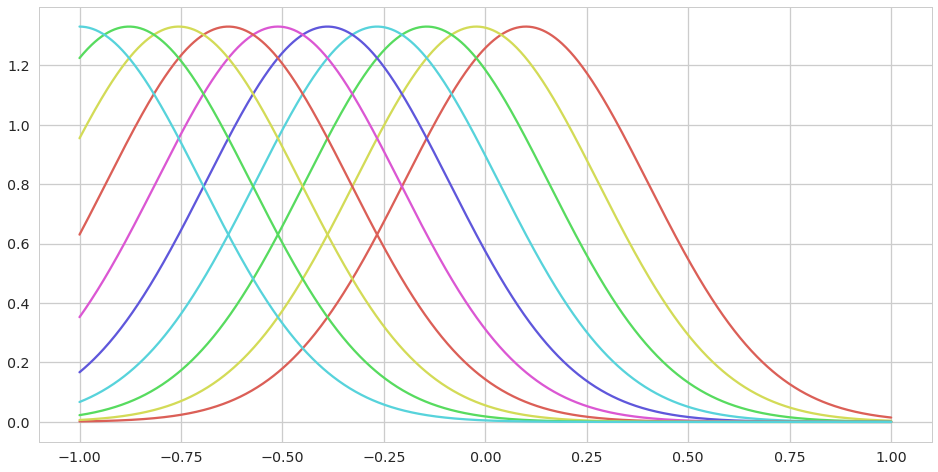

In [8]:
plt.rcParams['figure.figsize'] = (16, 8)

maxr = +1.0
minr = -1.0
ampl = maxr - minr

# NORMALLY RANDOM GAUSSIAN ARMS :

# draw random means for gaussian arms based on a given generative distribution
#generative_mean = 0.0
#generative_variance = 2.0
#means = np.random.normal(generative_mean, generative_variance, k)

#number of arms
#k = len(means)

# ONE POSITIVE ALL NEGATIVE GAUSSIAN ARMS :

#k = 30
#means = np.repeat(-0.1, k)
#means[k-1] = 0.1
#sigma = 0.5


# LINEARLY INCREASING GAUSSIAN ARMS :

# linear means for each arm
k = 10

means = np.linspace(-1.0, 0.1, k)
#means = np.linspace(-0.5, 0.5, k)

#variance for each arm
sigma = np.repeat(0.3, k)
#sigma = np.tile([0.4, 0.8], k)
#sigma = np.abs(means)*2
#sigma = np.concatenate( (np.linspace(0.5, 0.1, k // 2), np.linspace(0.1, 0.5, k // 2)) )

#arms objects (normal distribution, non-truncated)
#A = [Gaussian(mu, sigma=sigma, mini=float('-inf'), maxi=float('inf')) for mu in means]

#****
#arms objects (normal distribution, truncated)
A = [Gaussian(mu, sigma=sig, mini=minr, maxi=maxr) for mu, sig in zip(means, sigma)]
#****


#show distributions
x = np.linspace(minr, maxr, 1000)
idx = np.argsort(means)[::-1] #order
#for i, mu in enumerate(means):
for i in idx:
    mu = means[i]
    sig = sigma[i]
    plt.plot(x, mlab.normpdf(x, mu, sig), label="$\mu_{" + str(i+1) + "}=" + str(mu) + "$")#
#plt.legend()
plt.show()

In [9]:
#initial budget
b_0 = 10.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl)
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl)
     #Thompson(k)
    ]

#window average parameter (for graphics)
win = None #tau//10

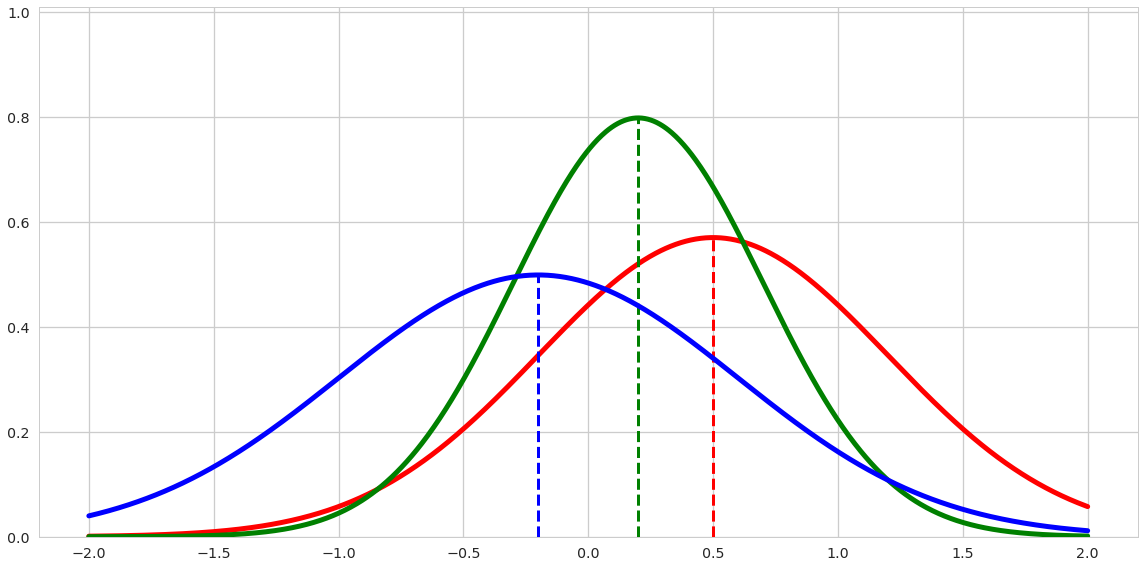

In [35]:
plt.rcParams['figure.figsize'] = (16, 8)

#show distributions
x = np.linspace(-2, +2, 1000)

plt.plot(x, mlab.normpdf(x, 0.5, 0.7), color='r', linewidth=5)
plt.plot([0.5, 0.5], [0.0, 0.57], color='r', linestyle='--', linewidth=3)
plt.plot(x, mlab.normpdf(x, 0.2, 0.5), color='g', linewidth=5)
plt.plot([0.2, 0.2], [0.0, 0.8], color='g', linestyle='--', linewidth=3)
plt.plot(x, mlab.normpdf(x, -0.2, 0.8), color='b', linewidth=5)
plt.plot([-0.2, -0.2], [0.0, 0.5], color='b', linestyle='--', linewidth=3)
plt.ylim(0.0, 1.01)
plt.tight_layout()
plt.savefig('images/gaussians.pdf', bbox_inches='tight')
plt.show()

## Simulation 3 : Linear Gaussian Short Horizon

 - Several Repetitions 
 - Short Horizon

In [10]:
#time-horizon
tau = 200

#repetitions
n = 100

M3 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M3.run(tqdm_leave=True)

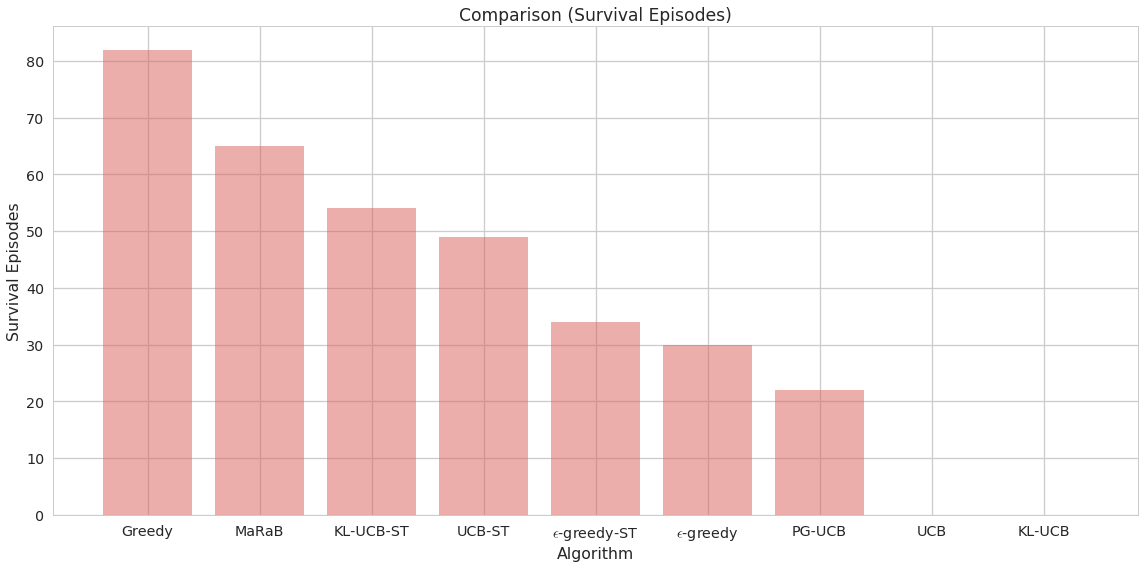

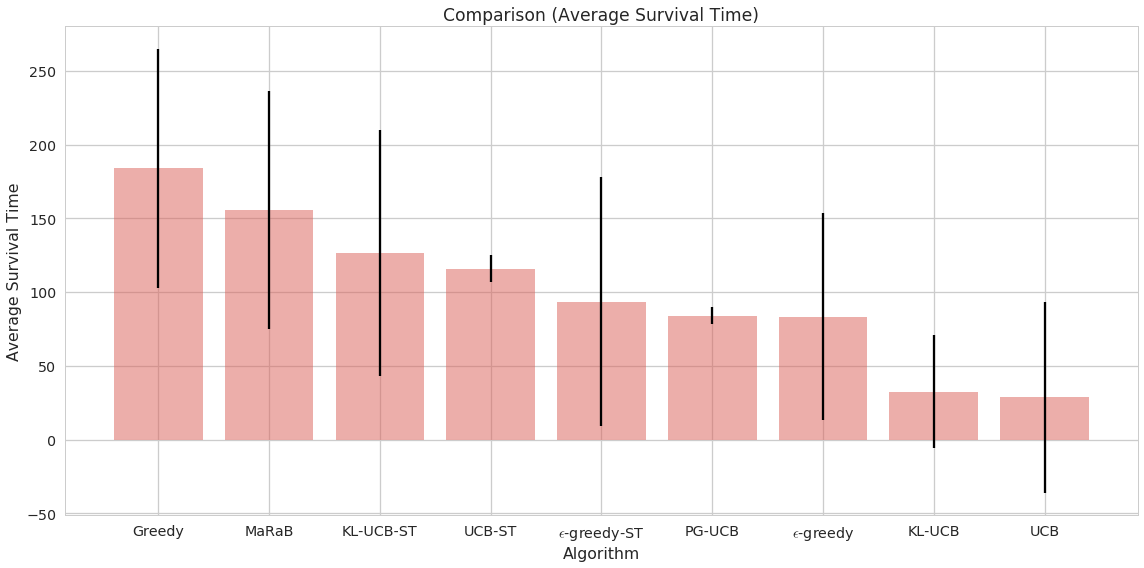

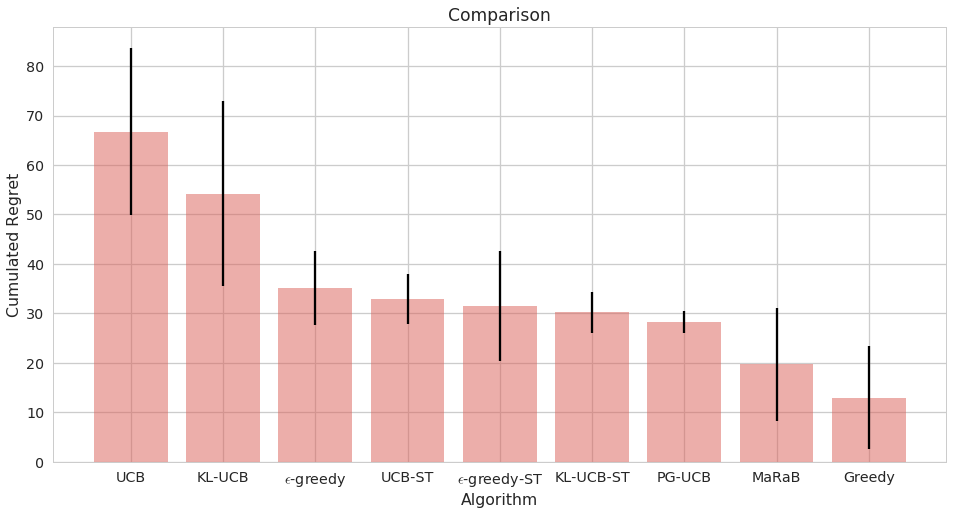

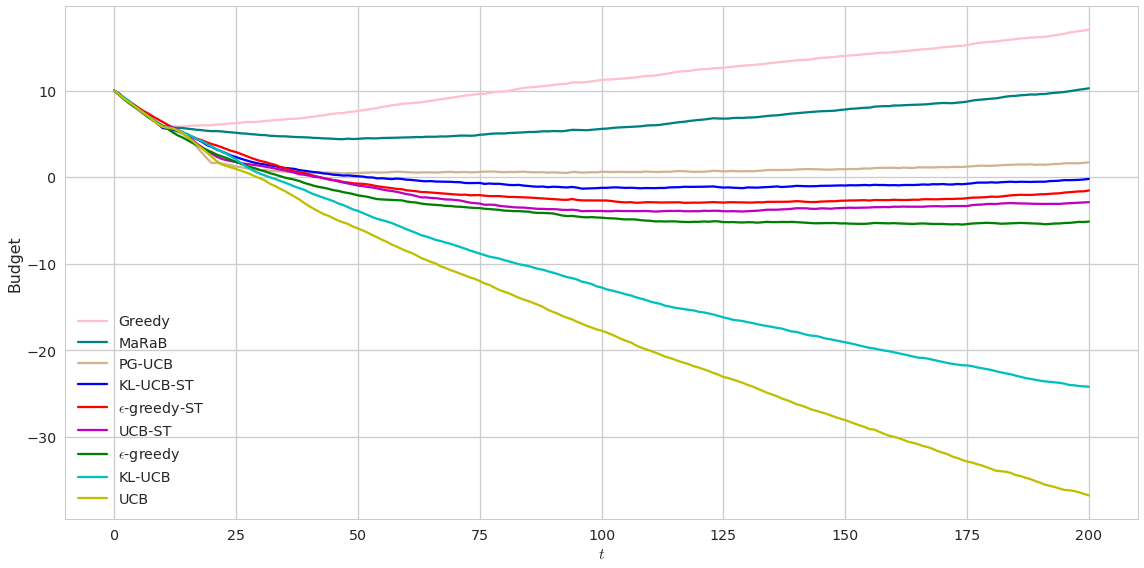

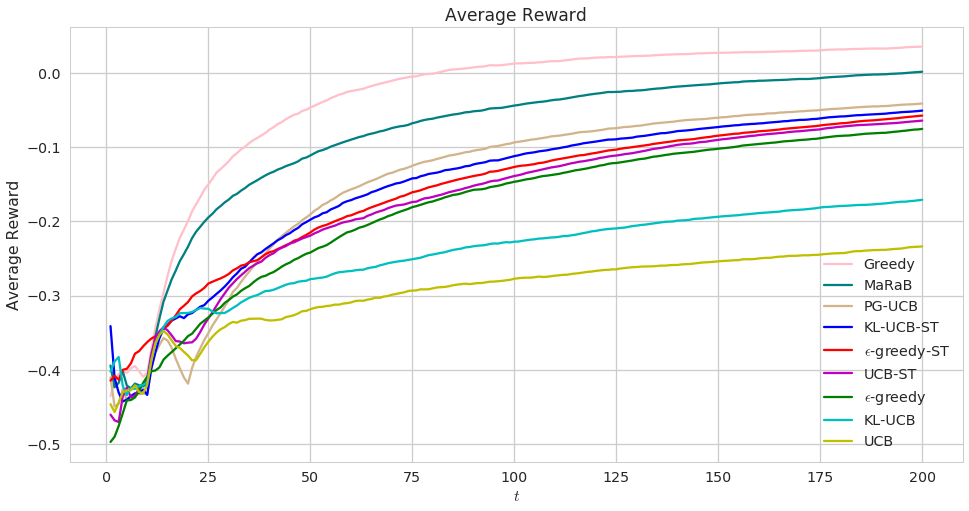

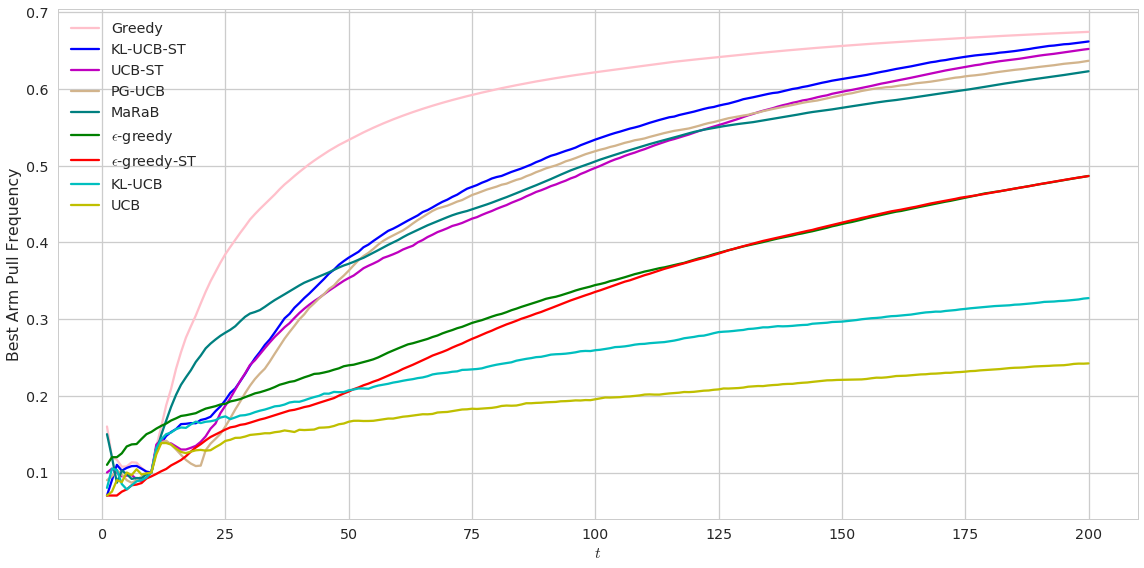

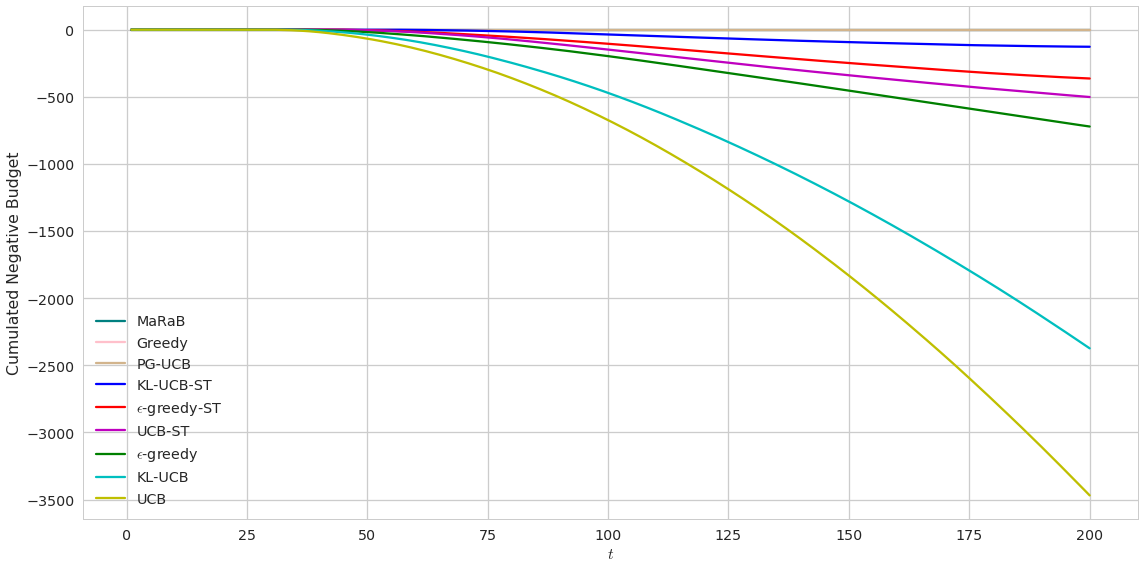

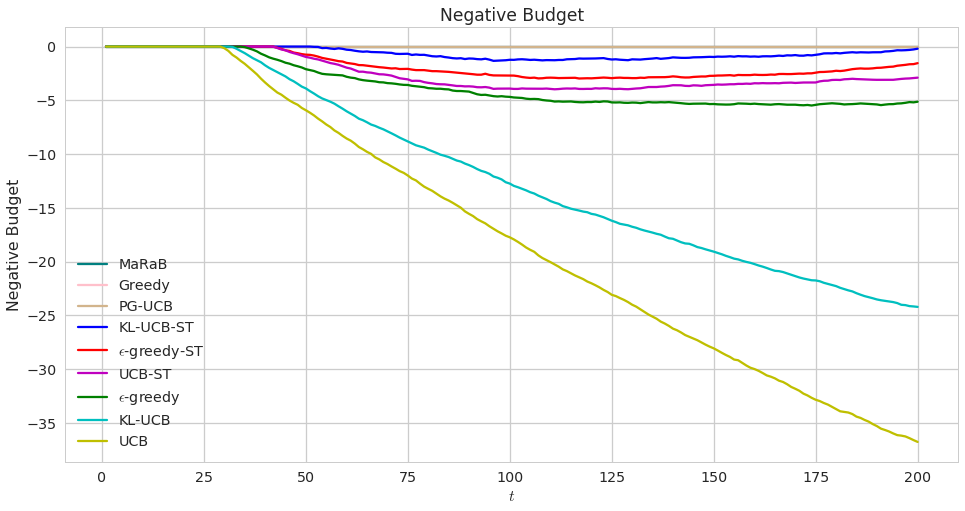

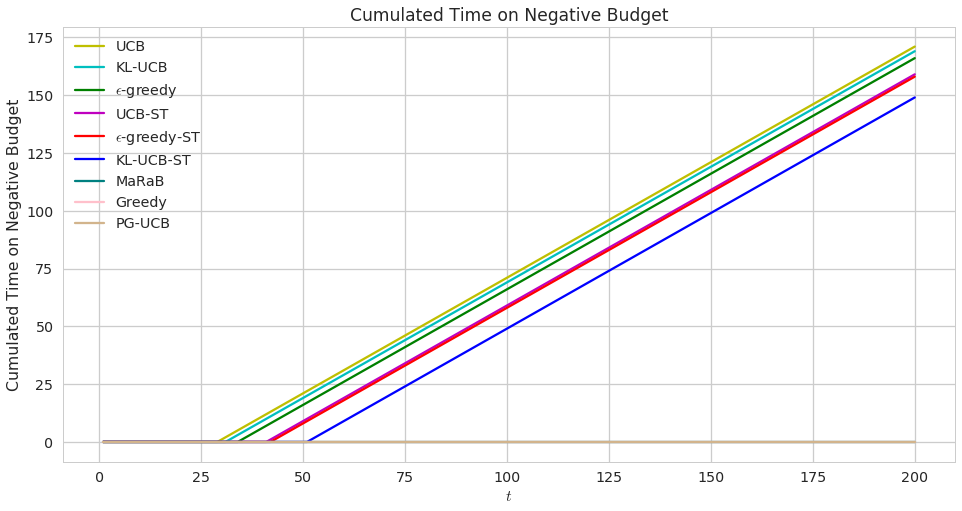

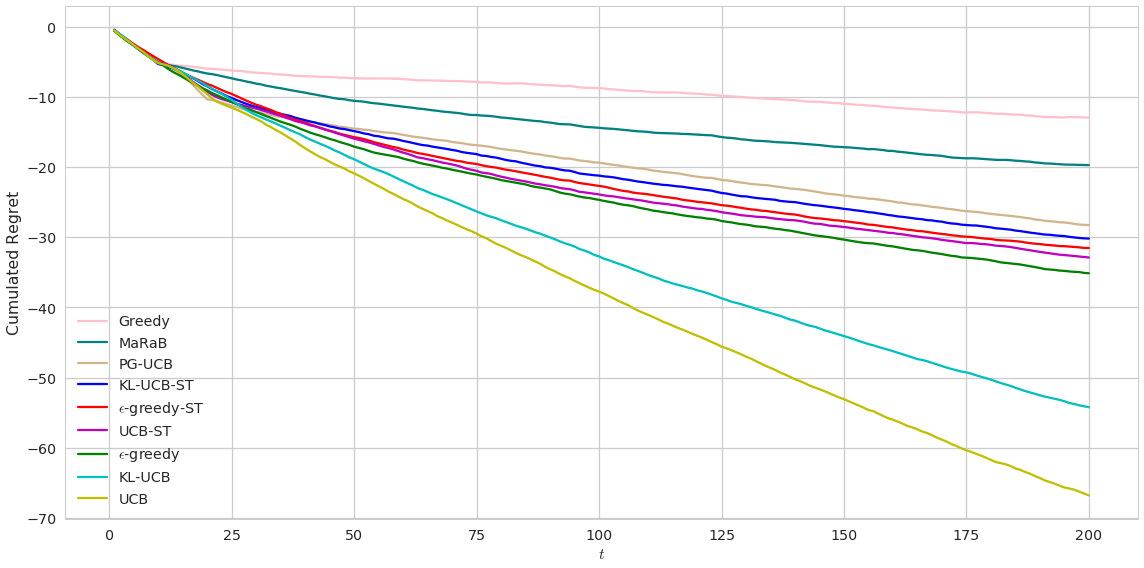

In [11]:
P3 = mabplt(M3)

values = [M3.renb, M3.MTTNB, M3.DTTNB, M3.mstnb, M3.dstnb, M3.msnb, M3.dsnb, M3.msl, M3.dsl]

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P3.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False, filename='images/surv_rate_GL_t100.pdf')
P3.plot_comp_algs_survival_time(names=labels, names_rotation='horizontal', compact_view=False, filename='images/surv_time_GL_t100.pdf')
P3.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False)

P3.plot_budget_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
plt.savefig('images/budget_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_precision_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
plt.savefig('images/precision_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_cumulated_negative_budget_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_cumulated_regret_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

#for j, g in enumerate(M.G):
#    P.plot_survival_histogram(j=j, title=str(g))

## Simulation 4 : Linear Gaussian - Long-Horizon

 - Few Repetitions 
 - Long Horizon

In [12]:
#time-horizon
tau = 15000 #15000 

#repetitions
n = 15 #100

M4 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M4.run(tqdm_leave=True)

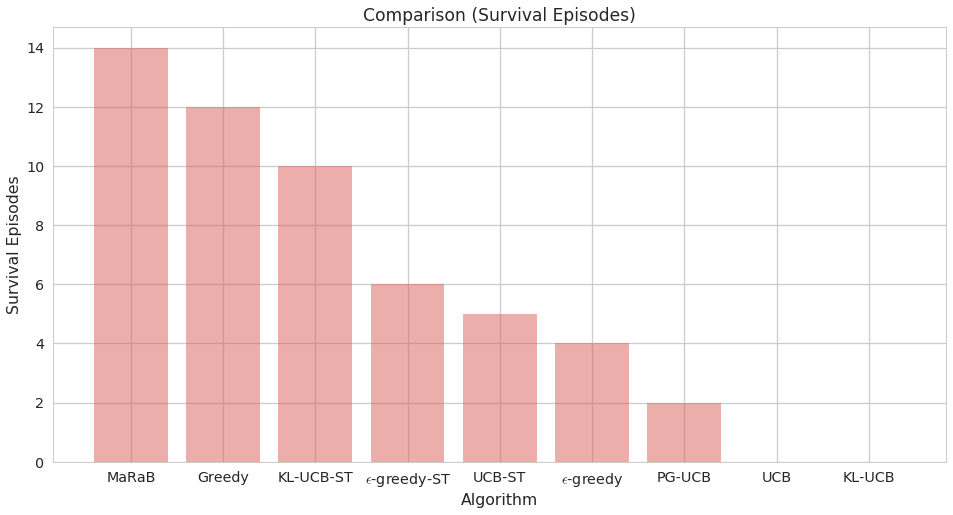

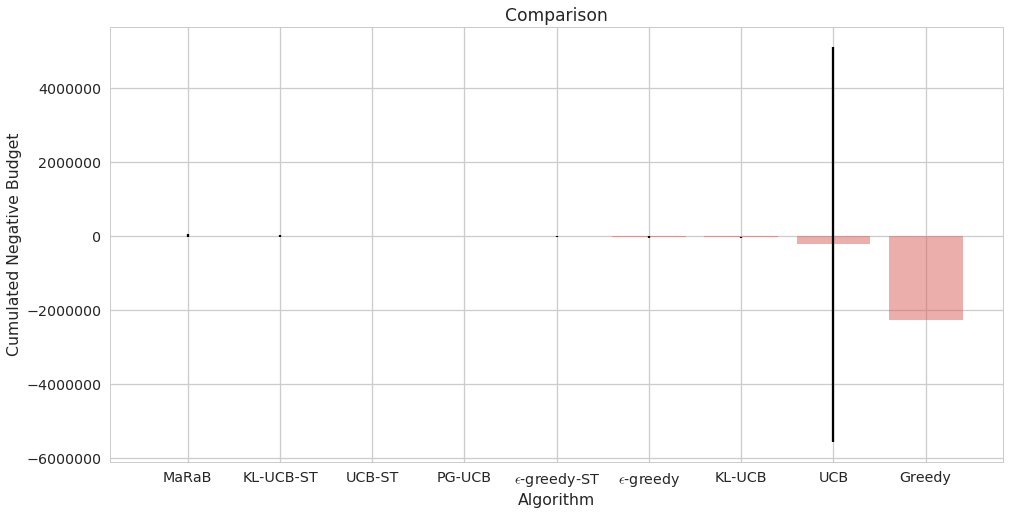

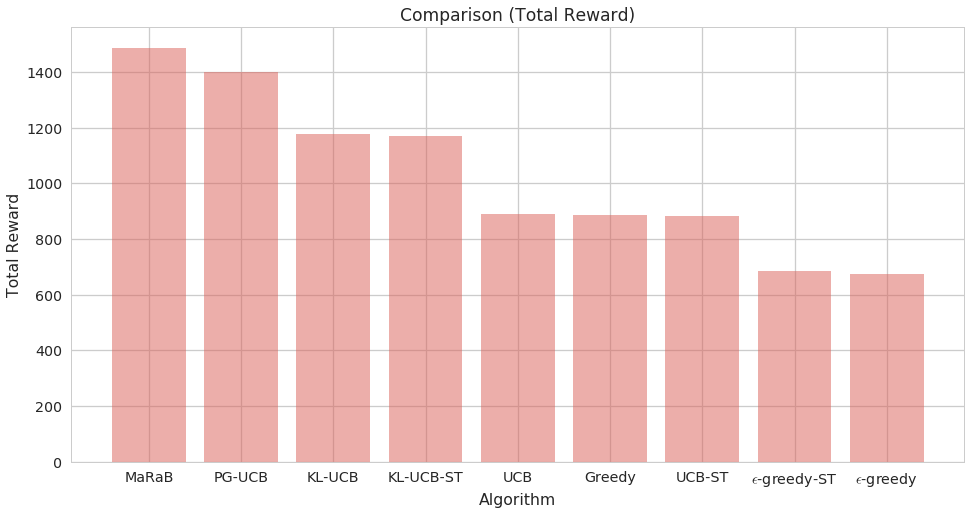

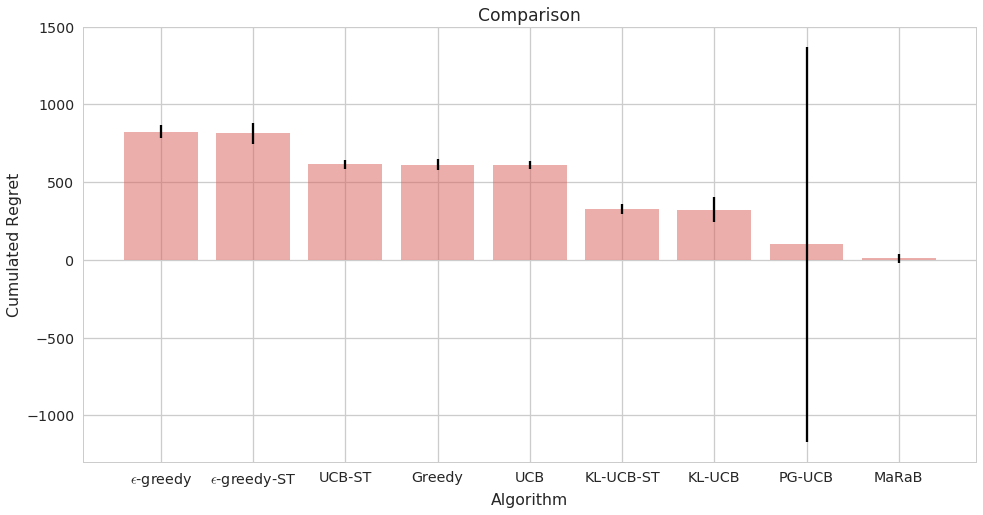

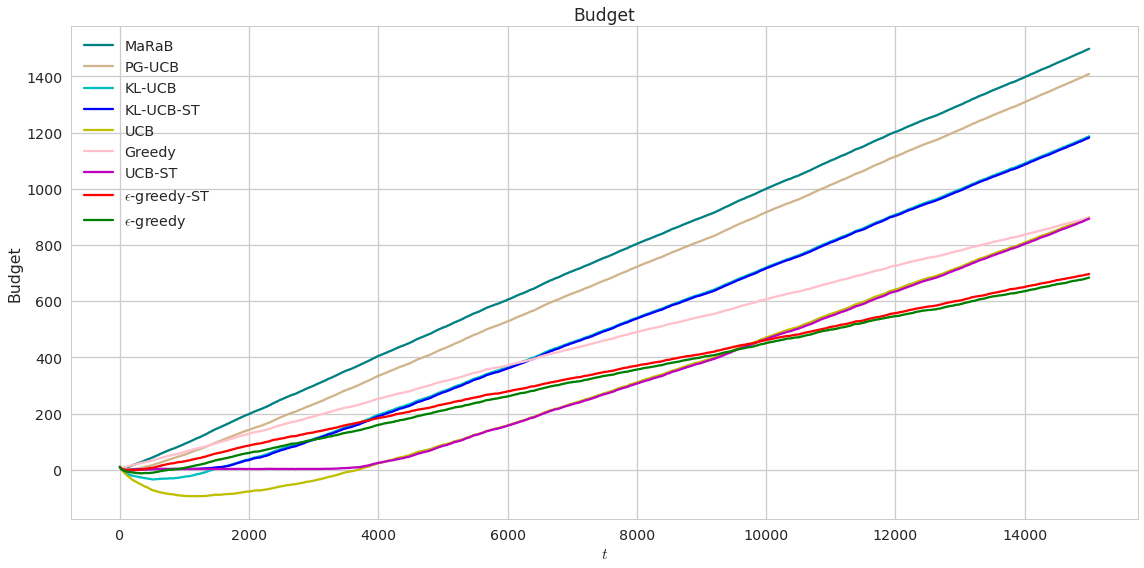

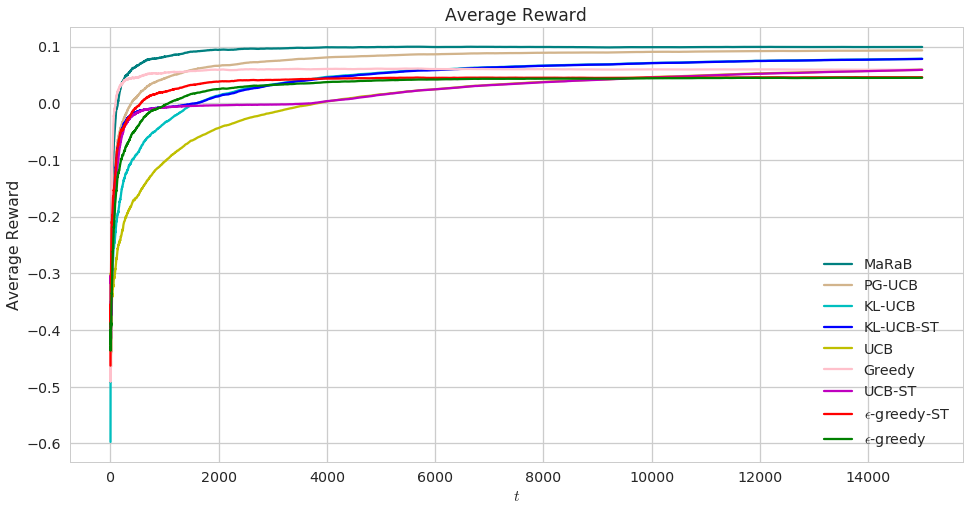

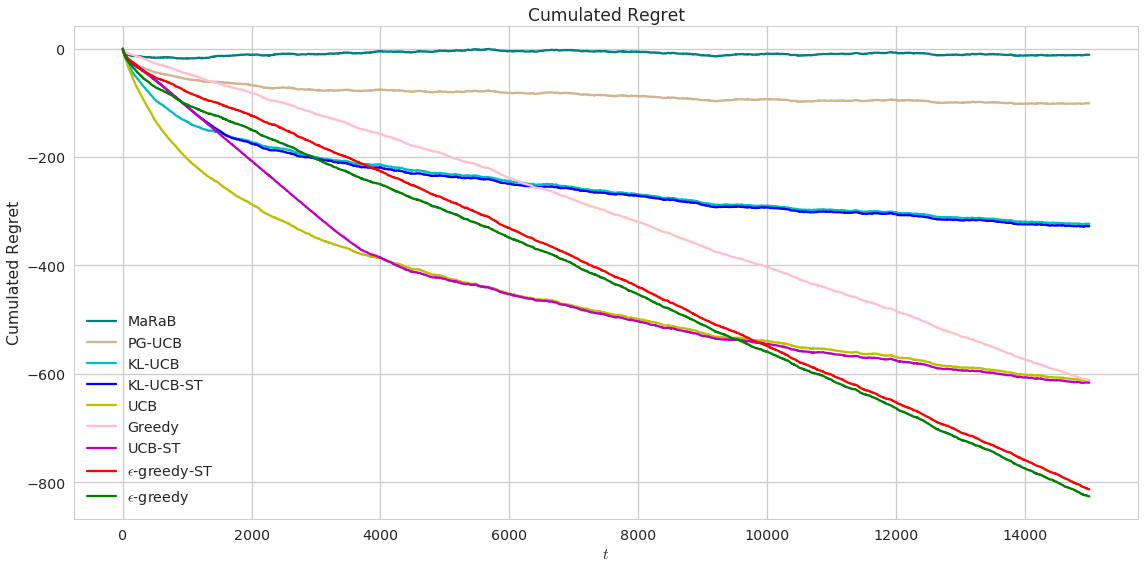

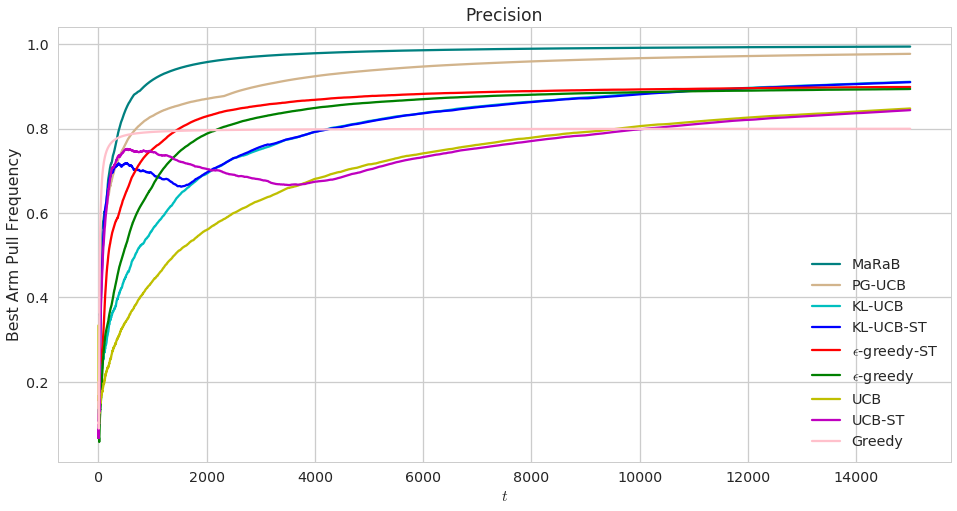

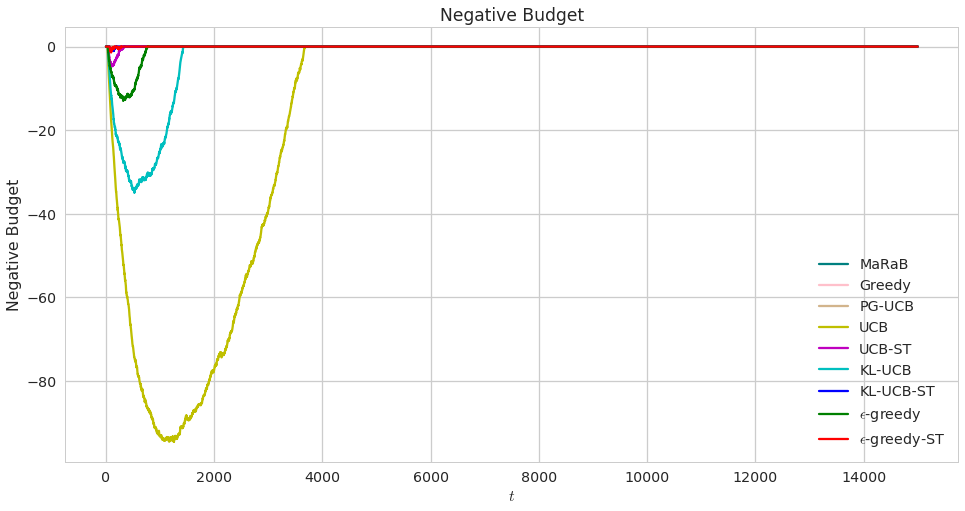

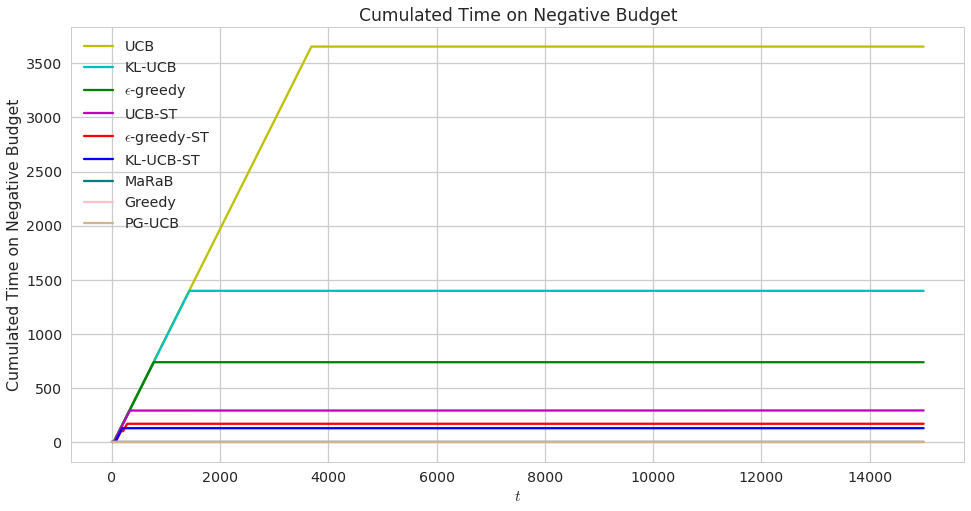

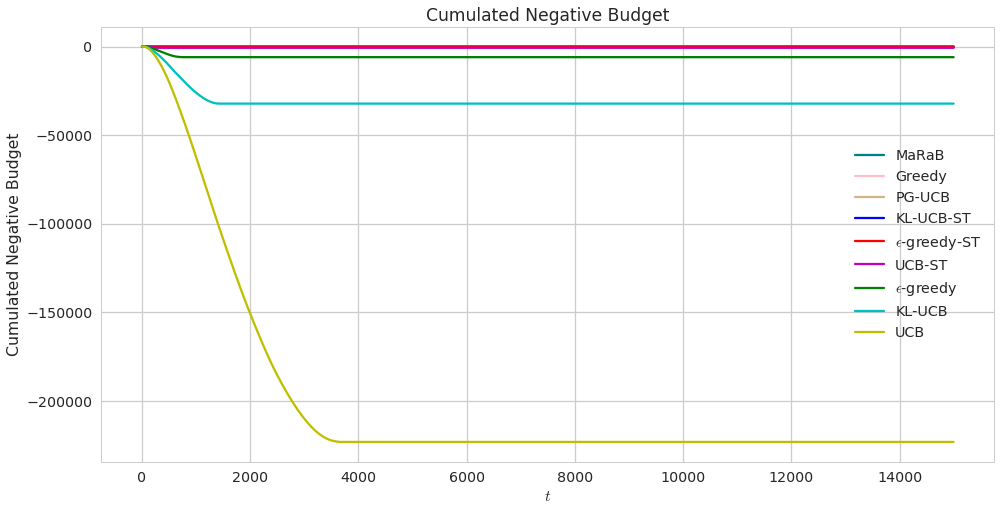

In [13]:
P4 = mabplt(M4)

values = [M4.renb, M4.MTTNB, M4.DTTNB, M4.mstnb, M4.dstnb, M4.msnb, M4.dsnb, M4.msl, M4.dsl]

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P4.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_cumulated_negative_budget(names=ralabelste_algs, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_total_rewards(names=labels, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False)

P4.plot_budget_progression(show=False, names=labels, linecolors=linecolors)
plt.tight_layout()
plt.savefig('images/budget_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P4.plot_average_reward_progression(names=rate_algs, linecolors=linecolors)

P4.plot_cumulated_regret_progression(show=False, names=labels, linecolors=linecolors)
plt.tight_layout()
plt.savefig('images/regret_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P4.plot_precision_progression(names=labels, linecolors=linecolors)

P4.plot_negative_budget_progression(names=labels, linecolors=linecolors)
P4.plot_negative_budget_time_progression(names=labels, linecolors=linecolors)
P4.plot_cumulated_negative_budget_progression(names=labels, linecolors=linecolors)

# Setting : 10-Gaussian-Arms Non-Linear

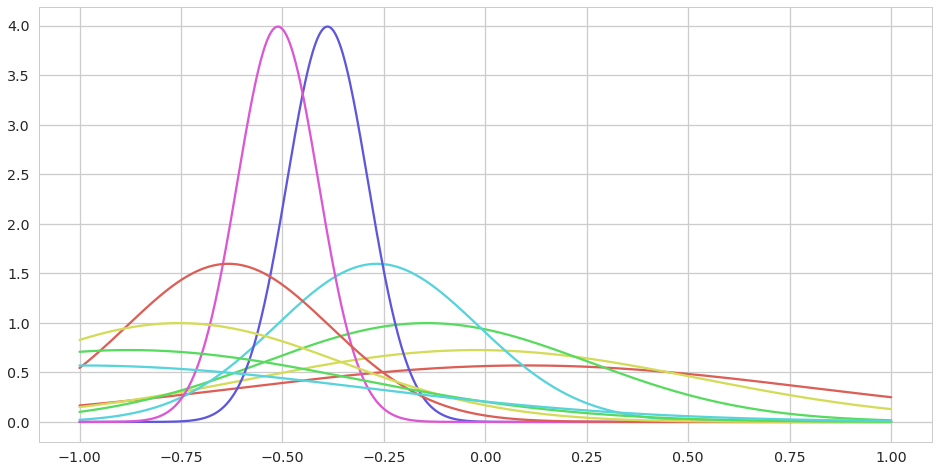

In [113]:
plt.rcParams['figure.figsize'] = (16, 8)

maxr = +1.0
minr = -1.0
ampl = maxr - minr

# NORMALLY RANDOM GAUSSIAN ARMS :

# draw random means for gaussian arms based on a given generative distribution
#generative_mean = 0.0
#generative_variance = 2.0
#means = np.random.normal(generative_mean, generative_variance, k)

#number of arms
#k = len(means)

# ONE POSITIVE ALL NEGATIVE GAUSSIAN ARMS :

#k = 30
#means = np.repeat(-0.1, k)
#means[k-1] = 0.1
#sigma = 0.5


# LINEARLY INCREASING GAUSSIAN ARMS :

# linear means for each arm
k = 10

means = np.linspace(-1.0, 0.1, k)
#means = np.linspace(-0.5, 0.5, k)

#variance for each arm
#sigma = np.repeat(0.3, k)
#sigma = np.tile([0.4, 0.8], k)
#sigma = np.abs(means)*2
sigma = np.concatenate( (np.linspace(0.7, 0.1, k // 2), np.linspace(0.1, 0.7, k // 2)) )

#arms objects (normal distribution, non-truncated)
#A = [Gaussian(mu, sigma=sigma, mini=float('-inf'), maxi=float('inf')) for mu in means]

#****
#arms objects (normal distribution, truncated)
A = [Gaussian(mu, sigma=sig, mini=minr, maxi=maxr) for mu, sig in zip(means, sigma)]
#****


#show distributions
x = np.linspace(minr, maxr, 1000)
idx = np.argsort(means)[::-1] #order
#for i, mu in enumerate(means):
for i in idx:
    mu = means[i]
    sig = sigma[i]
    plt.plot(x, mlab.normpdf(x, mu, sig), label="$\mu_{" + str(i+1) + "}=" + str(mu) + "$")#
#plt.legend()
plt.show()

In [114]:
#initial budget
b_0 = 20.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl)
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl)
     #Thompson(k)
    ]

#window average parameter (for graphics)
win = None #tau//10

## Simulation 5 : Gaussian Short Horizon

 - Several Repetitions 
 - Short Horizon

In [116]:
#time-horizon
tau = 200

#repetitions
n = 100

M5 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M5.run(tqdm_leave=True)

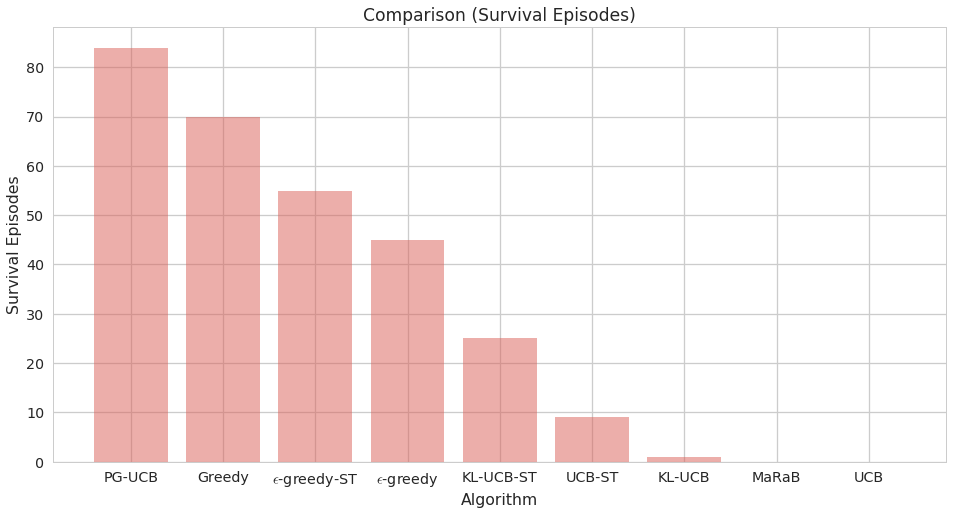

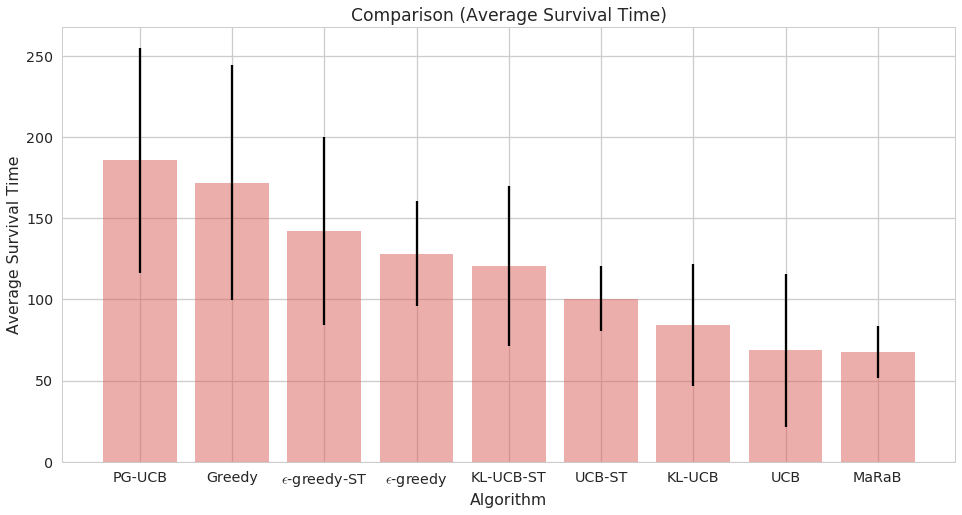

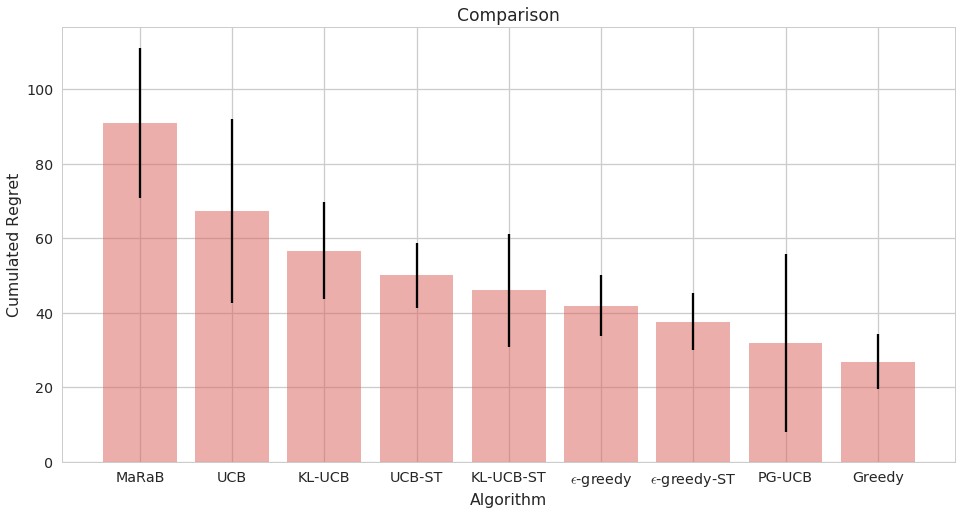

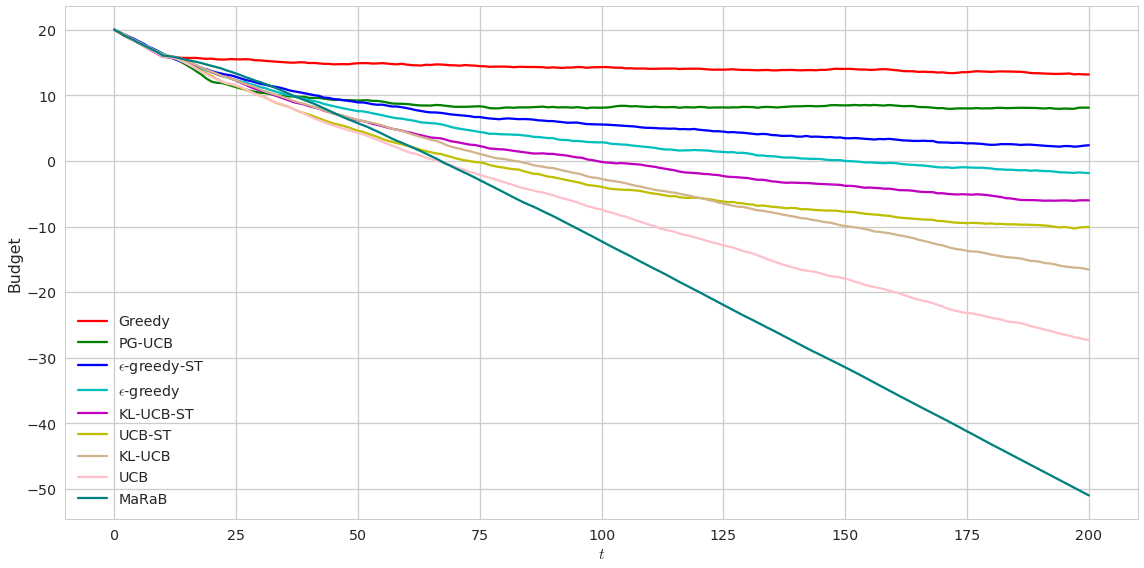

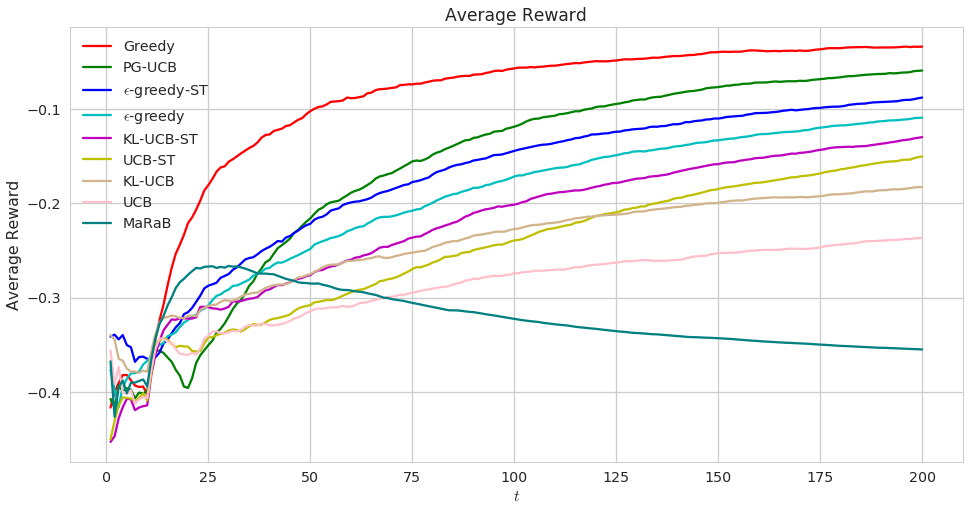

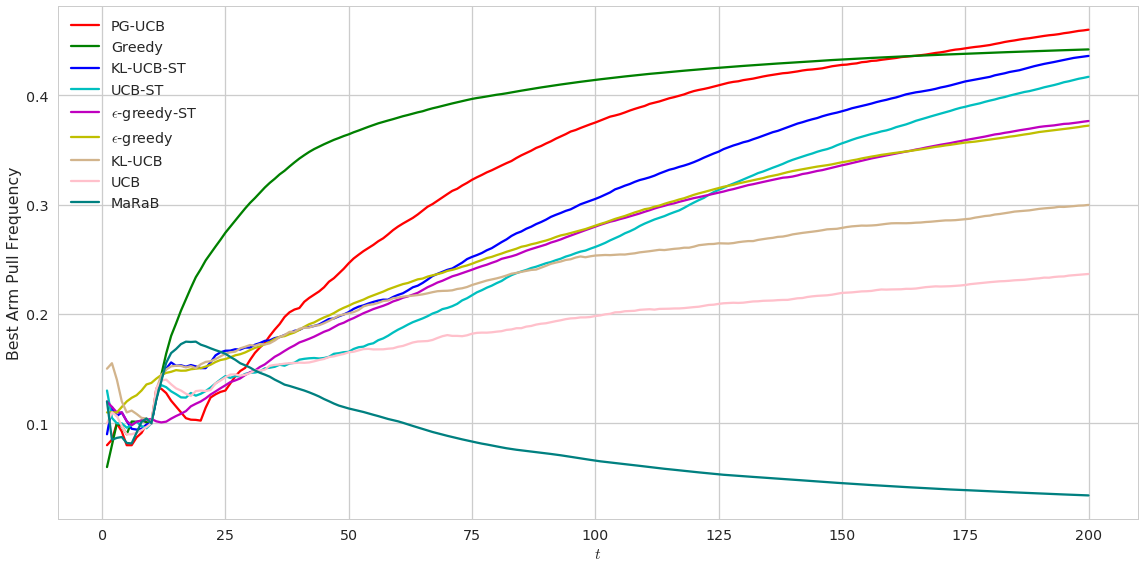

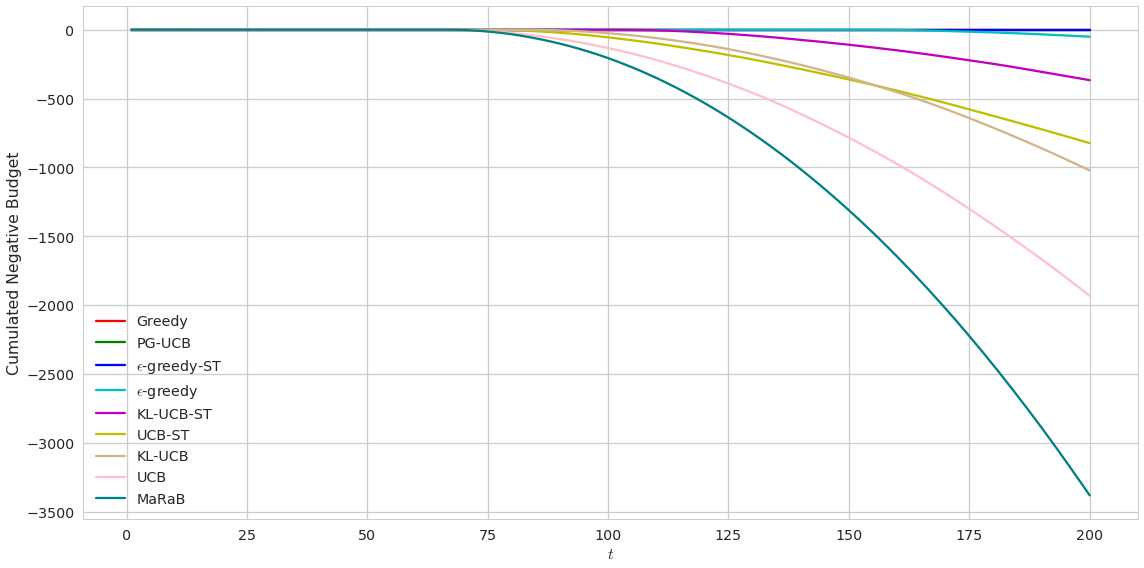

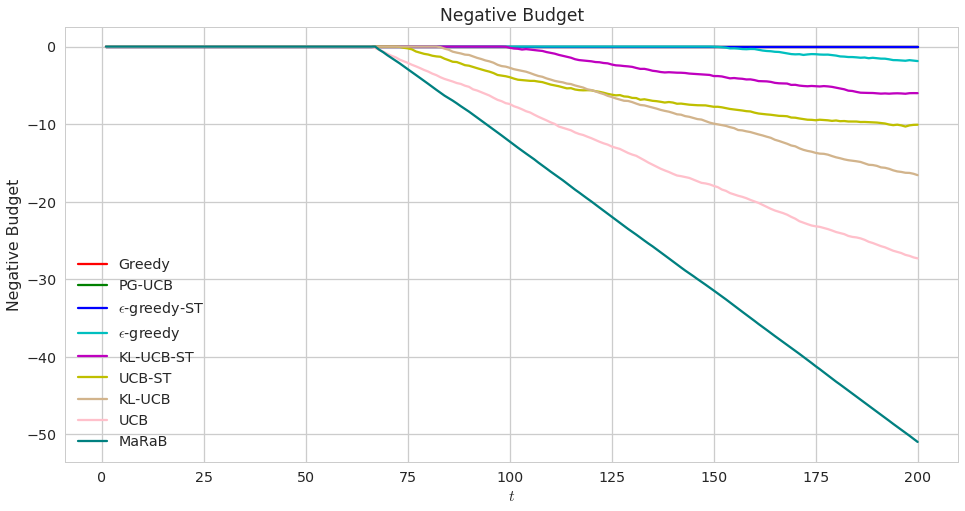

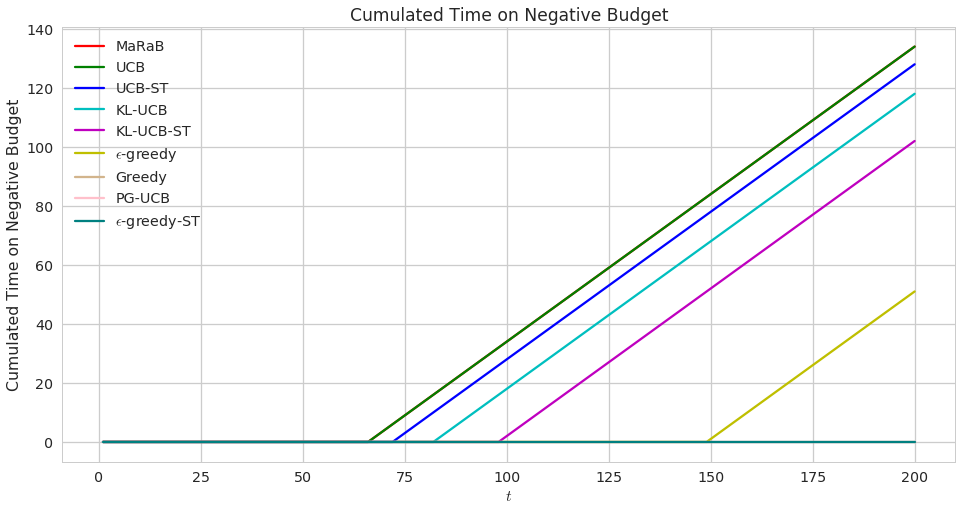

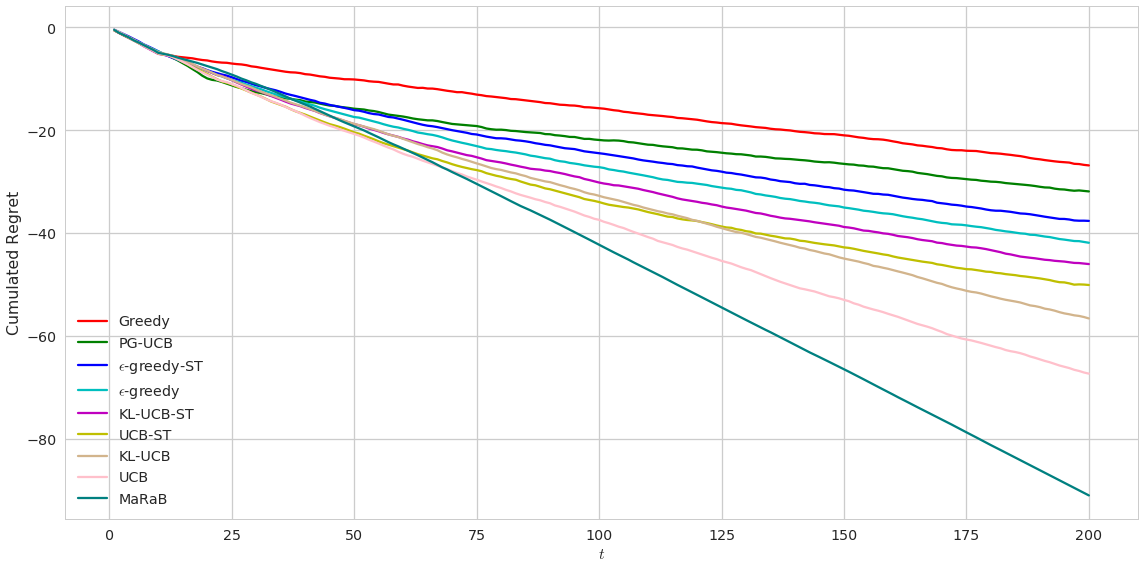

In [117]:
P5 = mabplt(M5)

rate_names = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Survival Time (std dev)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Time on Negative Budget (std dev)", 
    "Cumulative Negative Budget (averaged over episodes)",
    "Cumulative Negative Budget (std dev)",
    "Cumulative Regret (averaged over episodes)",
    "Cumulative Regret (std dev)"
    ]
#rate_algs = [str(g) for g in M.G]
rate_algs = ["$\epsilon$-greedy-ST", "$\epsilon$-greedy", "KL-UCB-ST", "KL-UCB", "UCB-ST", "UCB", "PG-UCB", "Greedy", "MaRaB"]
rate_values = [M5.renb, M5.MTTNB, M5.DTTNB, M5.mstnb, M5.dstnb, M5.msnb, M5.dsnb, M5.msl, M5.dsl]
df = pd.DataFrame(rate_values, rate_names, columns=rate_algs)
display(df)

P5.plot_comp_algs_ruined_episodes(names=rate_algs, names_rotation='horizontal', compact_view=False, filename='images/surv_rate_GL_t100.pdf')
P5.plot_comp_algs_survival_time(names=rate_algs, names_rotation='horizontal', compact_view=False, filename='images/surv_time_GL_t100.pdf')
P5.plot_comp_algs_cumulated_regret(names=rate_algs, names_rotation='horizontal', compact_view=False)

P5.plot_budget_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
plt.savefig('images/budget_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_average_reward_progression(names=rate_algs)

P5.plot_precision_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
plt.savefig('images/precision_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_cumulated_negative_budget_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_negative_budget_progression(names=rate_algs)

P5.plot_negative_budget_time_progression(names=rate_algs)

P5.plot_cumulated_regret_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

#for j, g in enumerate(M.G):
#    P.plot_survival_histogram(j=j, title=str(g))

## Simulation 4 : Linear Gaussian - Long-Horizon

 - Few Repetitions 
 - Long Horizon

In [120]:
#time-horizon
tau = 15000 #15000 

#repetitions
n = 1 #100

M6 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M6.run(tqdm_leave=True)

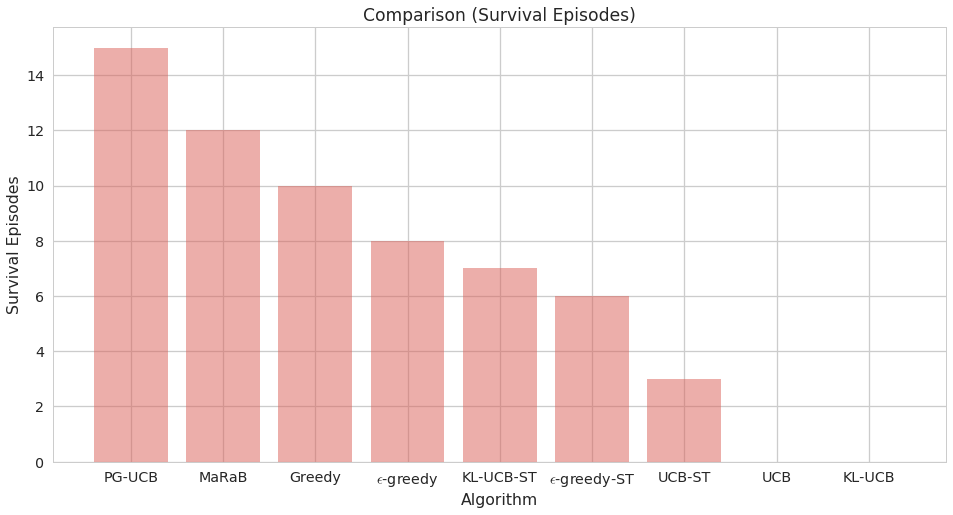

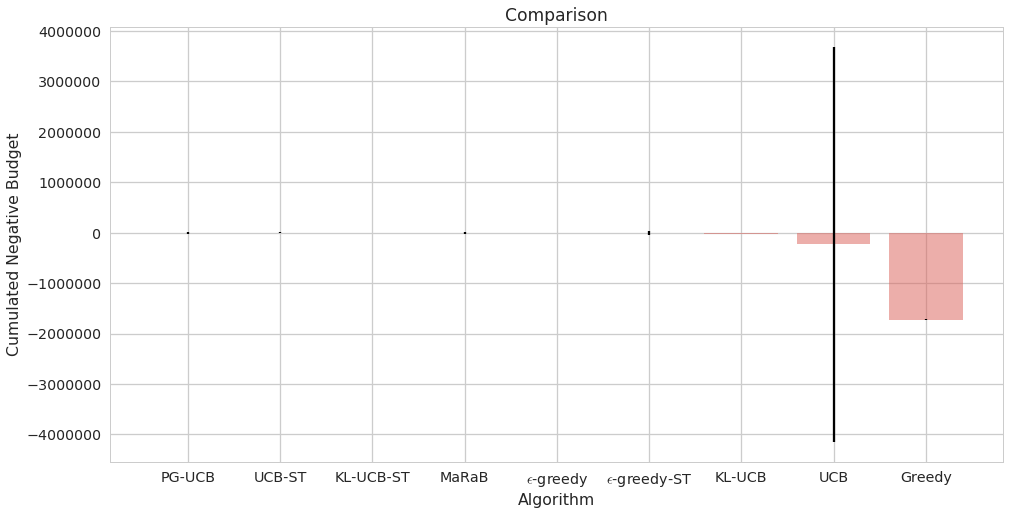

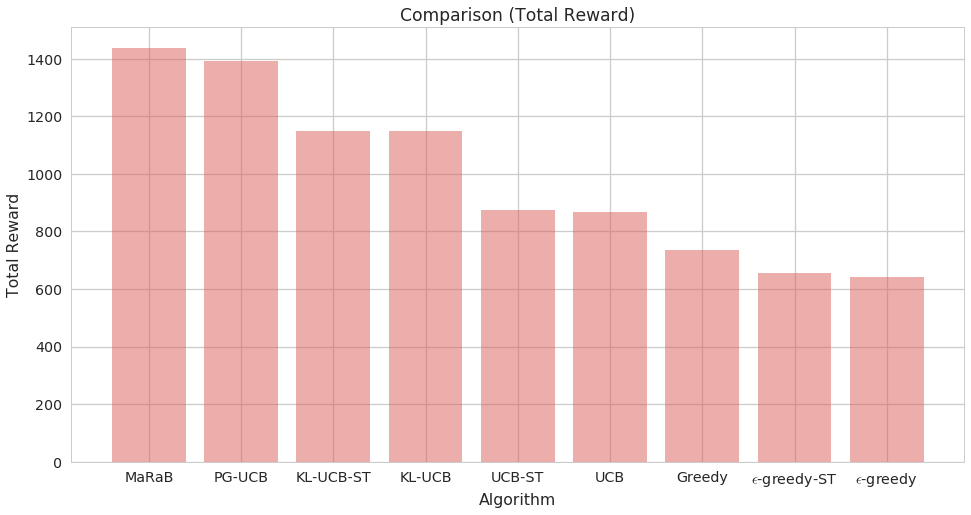

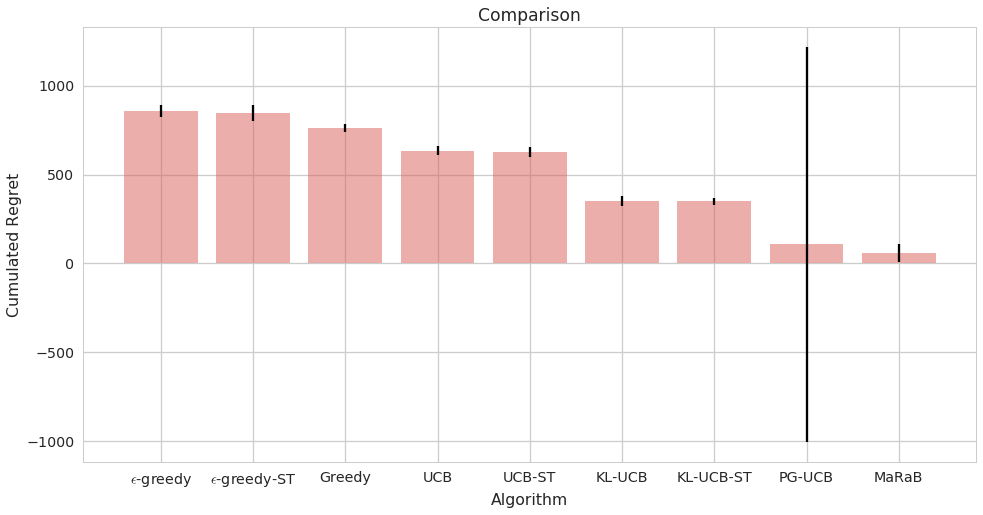

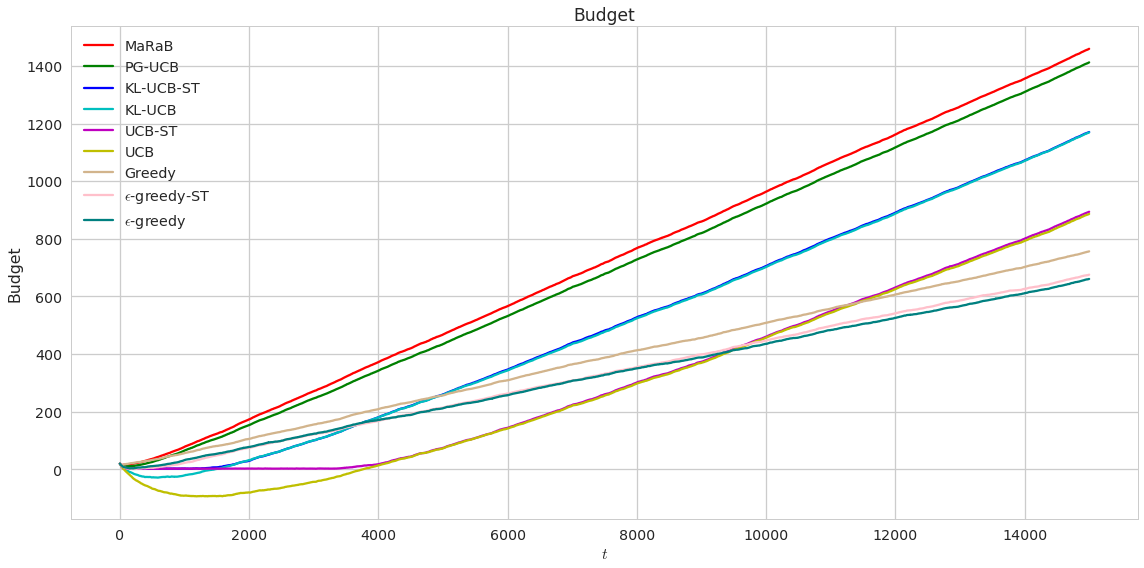

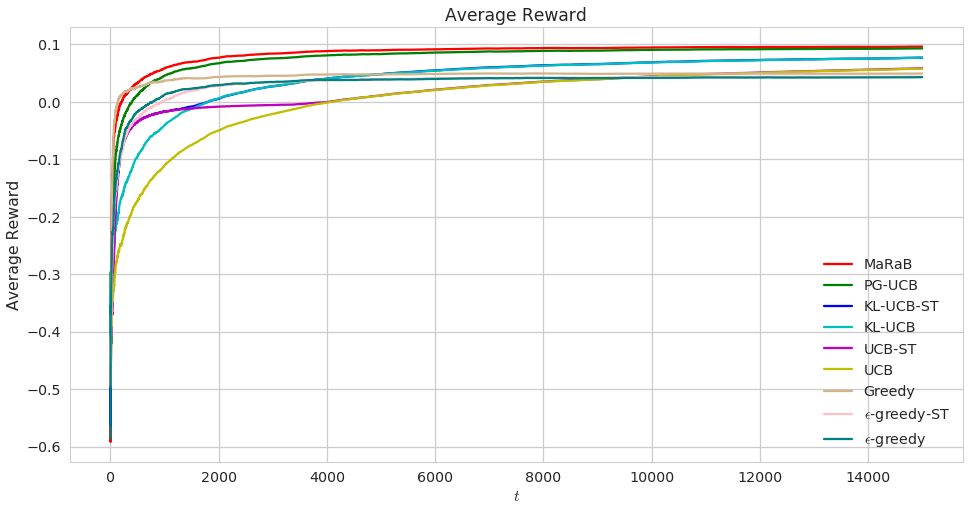

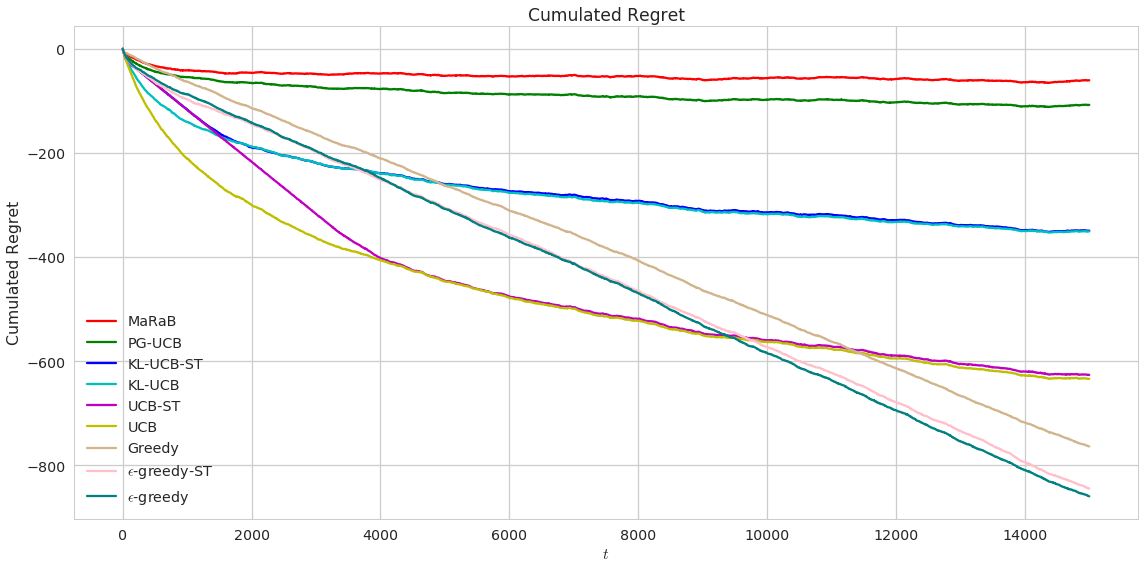

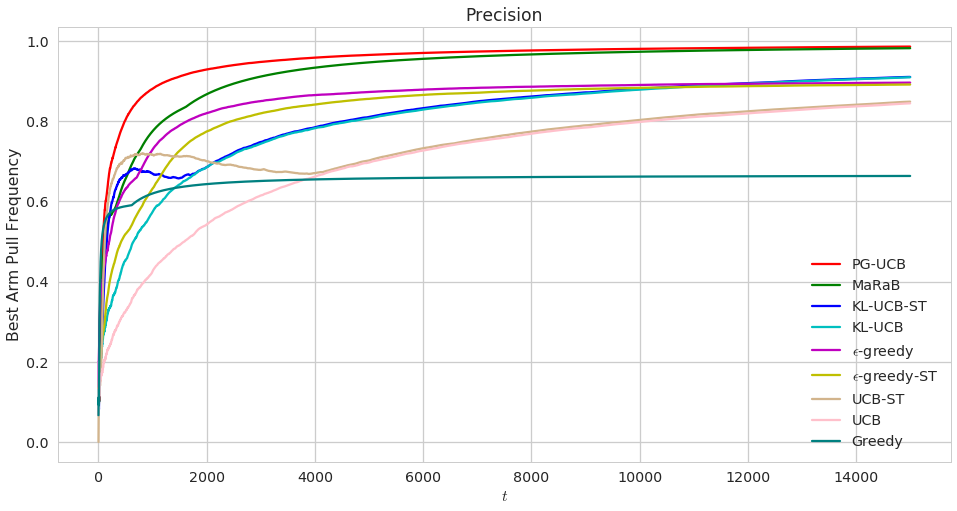

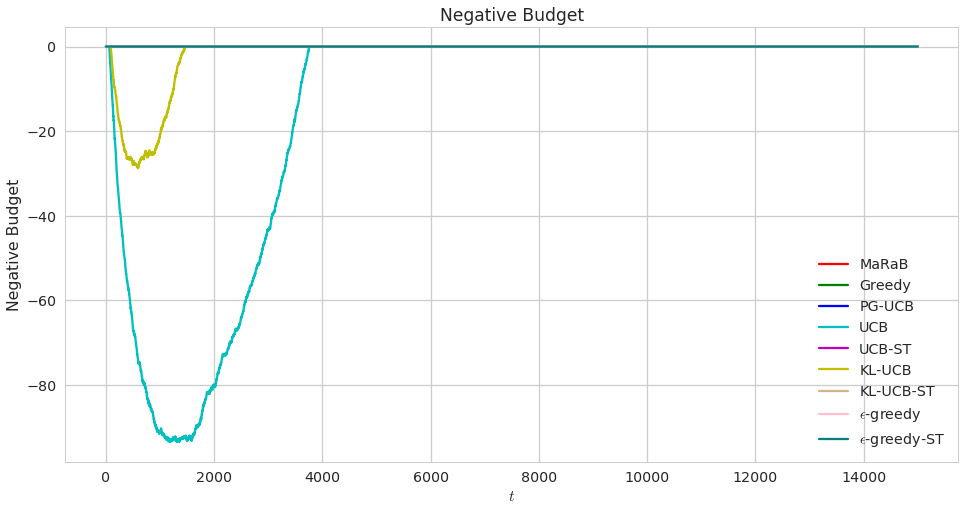

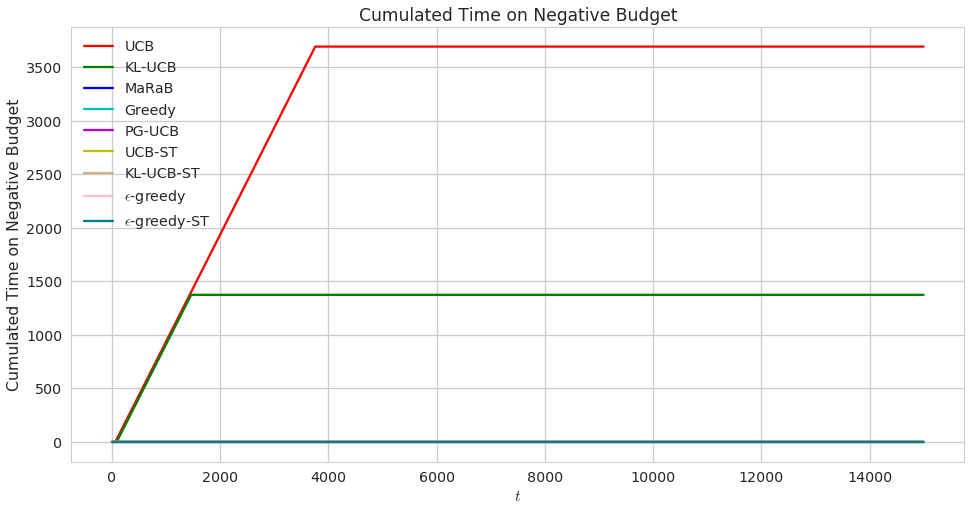

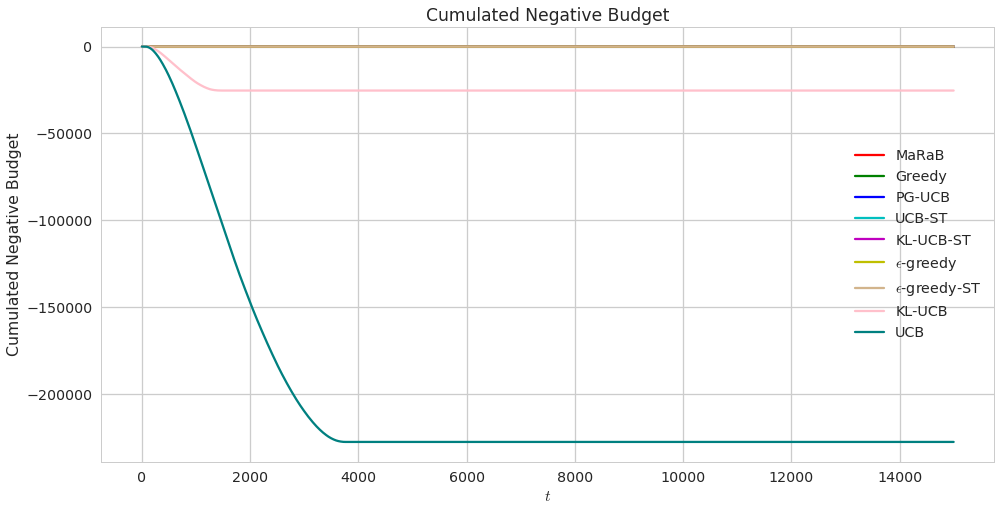

In [99]:
P6 = mabplt(M6)

rate_values = [M6.renb, M6.MTTNB, M6.DTTNB, M6.mstnb, M6.dstnb, M6.msnb, M6.dsnb, M6.msl, M6.dsl]
df = pd.DataFrame(rate_values, rate_names, columns=rate_algs)
display(df)

P6.plot_comp_algs_ruined_episodes(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_cumulated_negative_budget(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_total_rewards(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_cumulated_regret(names=rate_algs, names_rotation='horizontal', compact_view=False)

P6.plot_budget_progression(show=False, names=rate_algs)
plt.tight_layout()
plt.savefig('images/budget_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P6.plot_average_reward_progression(names=rate_algs)

P6.plot_cumulated_regret_progression(show=False, names=rate_algs)
plt.tight_layout()
plt.savefig('images/regret_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P6.plot_precision_progression(names=rate_algs)

P6.plot_negative_budget_progression(names=rate_algs)
P6.plot_negative_budget_time_progression(names=rate_algs)
P6.plot_cumulated_negative_budget_progression(names=rate_algs)

## Load and Save

In [16]:
# Load the simulation back from the pickle file.
with open('mab.pickle', 'rb') as f:
M = pickle.load(f)

In [ ]:
# Save the simulation into a pickle file.
with open('mab.pickle', 'wb') as f:
    pickle.dump(M, f, pickle.HIGHEST_PROTOCOL)